In [1]:
# ObaidUrRehman

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib.pyplot import pie, axis, show

In [4]:
hfd = pd.read_csv('hospitaldata.csv',thousands=',')
hfd.head()

,Date,id,Time,Age,Sex,Consulting..Doctor,Specialty,Procedure,Total..Charges,Amount..Received.,Amount..Balance,Amount.Received.By,Amount.in.Hospital,Receptionist..Name,Next.Apt
0,"Sunday, January 01, 2017",101,11:00AM,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN


# Q1. Remove the dots in the names.

In [6]:
hfd.columns = [col.replace('.','') for col in hfd.columns]
hfd.head()

,Date,id,Time,Age,Sex,ConsultingDoctor,Specialty,Procedure,TotalCharges,AmountReceived,AmountBalance,AmountReceivedBy,AmountinHospital,ReceptionistName,NextApt
0,"Sunday, January 01, 2017",101,11:00AM,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN


# Q2. Which day of the week is expected to have most visits?

In [7]:
#Checking nan in dataset

sum(hfd['Date'].isnull())


0

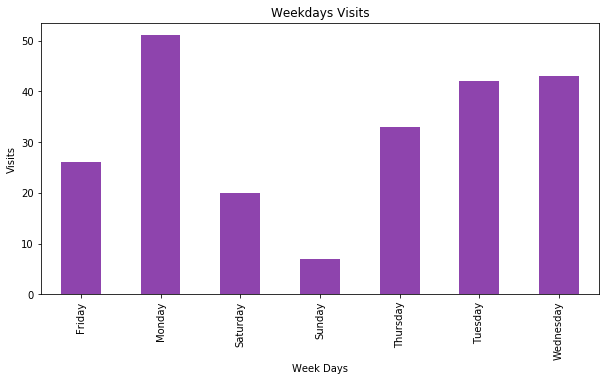

In [8]:
# So there are 0 Null values in Date column

weekday = pd.to_datetime(hfd['Date'])
hfd['WeekDay'] = weekday.dt.weekday_name  #Monday=0, Sunday=6
# grouping by weekday
DayData = hfd.groupby('WeekDay').WeekDay.count()
g1 = DayData.plot(kind='bar',figsize=(10, 5),color = '#8E44AD',title="Weekdays Visits") 
g1.set_xlabel('Week Days')
g1.set_ylabel('Visits')

#As we can see from plot, Monday has the most visits

# Q3. What is the average age of patients?

In [9]:
# First checking if there are nan values in age column
sum(hfd['Age'].isnull())

19

In [10]:
# There are 19 Nan values in Age column

#Lets check if there are garbage valus in Age column

hfd.Age.unique()

array(['40', '26', '30', '27', '43', '28', '2', '32', '76', '75', '36',
       '42', '23', '48', '25', '50', '60', '-', '57', nan, '39', '6', '5',
       '9', '29', '45', '34', '52', '21', '58', '33', '10', '19', '53',
       '55', '28M', '47', '49', '31', '7', '8', '17', '54', '35', '80',
       '70', '20', '13', '18', '14', '6M', '24', '3', '38', '22', '65',
       '64', '78', '56'], dtype=object)

In [11]:
# There are grabage values e.g. "-", "6M". So we need to clean this column

# We can use mean(Age) to fill the garbage values, but because our dataset is too small, ill just replace them with nan

hfd['Age'] =pd.to_numeric(hfd.Age,errors='coerce')
np.mean(hfd.Age) #Average age is 32.7

32.734375

# Q4. How many children were entertained?

Age
2.0     3
3.0     7
5.0     1
6.0     4
7.0     1
8.0     1
9.0     3
10.0    3
Name: Age, dtype: int64
Number of childrens entertained:23


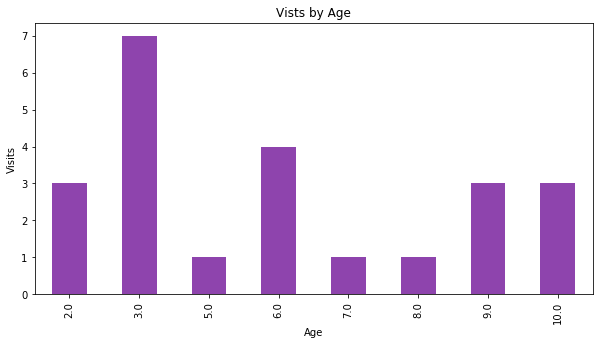

In [12]:
child = hfd[['Age']].copy()
child =child.loc[child['Age']<=12]
child = child.groupby('Age').Age.count()
print child
print "Number of childrens entertained:"+str(sum(child))  #23 child were entertained
g1 = child.plot(kind='bar',figsize=(10, 5),color = '#8E44AD',title="Vists by Age") 
g1.set_xlabel('Age')
g1.set_ylabel('Visits')